In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

In [8]:
# Data Importing

data = pd.read_csv('/weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
data.shape

(76113, 23)

In [10]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1112
MaxTemp            938
Rainfall          2229
Evaporation      38833
Sunshine         45649
WindGustDir       6130
WindGustSpeed     6122
WindDir9am        6916
WindDir3pm        2805
WindSpeed9am      1381
WindSpeed3pm      1995
Humidity9am       1821
Humidity3pm       2249
Pressure9am      10590
Pressure3pm      10537
Cloud9am         30077
Cloud3pm         31035
Temp9am           1481
Temp3pm           1963
RainToday         2230
RainTomorrow      2229
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76113 entries, 0 to 76112
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           76113 non-null  object 
 1   Location       76113 non-null  object 
 2   MinTemp        75001 non-null  float64
 3   MaxTemp        75175 non-null  float64
 4   Rainfall       73884 non-null  float64
 5   Evaporation    37280 non-null  float64
 6   Sunshine       30464 non-null  float64
 7   WindGustDir    69983 non-null  object 
 8   WindGustSpeed  69991 non-null  float64
 9   WindDir9am     69197 non-null  object 
 10  WindDir3pm     73308 non-null  object 
 11  WindSpeed9am   74732 non-null  float64
 12  WindSpeed3pm   74118 non-null  float64
 13  Humidity9am    74292 non-null  float64
 14  Humidity3pm    73864 non-null  float64
 15  Pressure9am    65523 non-null  float64
 16  Pressure3pm    65576 non-null  float64
 17  Cloud9am       46036 non-null  float64
 18  Cloud3

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,75001.0,11.271084,6.226131,-8.5,6.8,11.4,16.1,31.9
MaxTemp,75175.0,22.257790,6.935675,-4.8,17.5,21.8,26.6,47.3
Rainfall,73884.0,2.360311,8.293909,0.0,0.0,0.0,0.6,371.0
Evaporation,37280.0,5.212366,4.149631,0.0,2.4,4.4,7.0,145.0
Sunshine,30464.0,7.327101,3.842799,0.0,4.4,8.1,10.4,14.5
WindGustSpeed,69991.0,40.245032,14.389752,7.0,30.0,39.0,48.0,135.0
WindSpeed9am,74732.0,13.952858,9.420504,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,74118.0,18.564532,9.390574,0.0,11.0,17.0,24.0,83.0
Humidity9am,74292.0,71.145978,17.848594,3.0,59.0,72.0,85.0,100.0
Humidity3pm,73864.0,52.196022,20.730859,1.0,37.0,52.0,66.0,100.0


In [15]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [19]:
minimum_temp = data['MinTemp'].min()
print("Minimum Sıcaklık:",+minimum_temp)

Minimum Sıcaklık: -8.5


In [22]:
maximum_temp = data['MaxTemp'].max()
print("Maksimum Sıcaklık:",+maximum_temp)

Maksimum Sıcaklık: 47.3


In [23]:
data['Sunshine'].value_counts()

0.0     1168
9.8      421
10.0     407
10.3     390
10.1     389
        ... 
13.9      11
14.0       6
14.5       1
14.3       1
14.1       1
Name: Sunshine, Length: 144, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1d67d9590>,
      dtype=object)

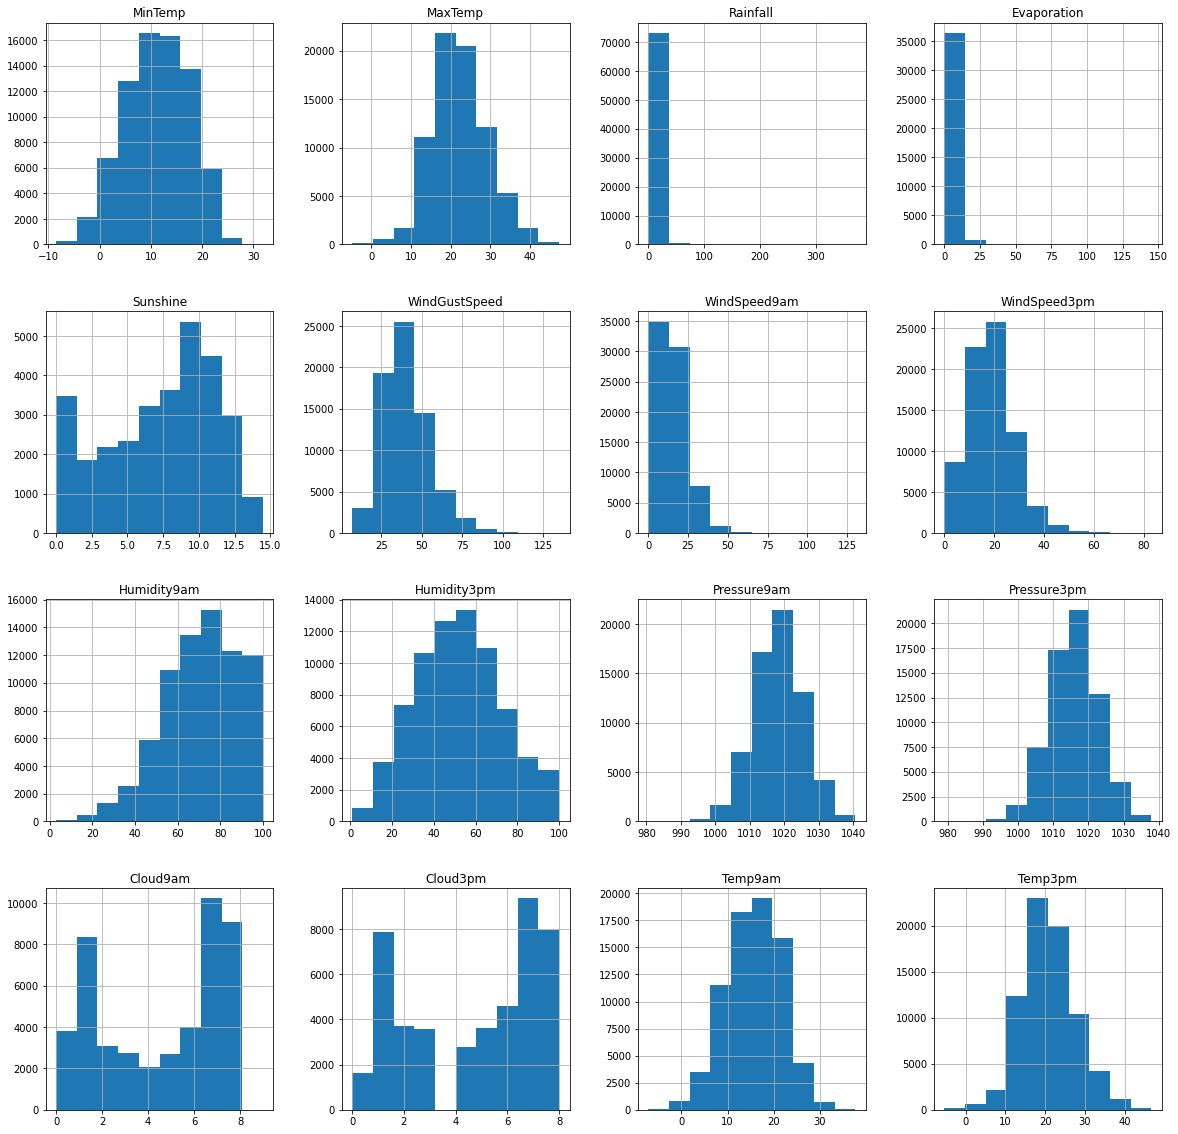

In [26]:
data.hist(figsize=(20,20))

In [29]:
# Kayıp Veri Oranları

print('Kayıp Veri Oranı \n')
print((data.isnull().sum().sort_values(ascending=False)/len(data))* 100)

Kayıp Veri Oranı 

Sunshine         59.975300
Evaporation      51.020194
Cloud3pm         40.774900
Cloud9am         39.516246
Pressure9am      13.913523
Pressure3pm      13.843890
WindDir9am        9.086490
WindGustDir       8.053815
WindGustSpeed     8.043304
WindDir3pm        3.685310
Humidity3pm       2.954817
RainToday         2.929854
RainTomorrow      2.928540
Rainfall          2.928540
WindSpeed3pm      2.621103
Temp3pm           2.579060
Humidity9am       2.392495
Temp9am           1.945791
WindSpeed9am      1.814408
MinTemp           1.460986
MaxTemp           1.232378
Location          0.000000
Date              0.000000
dtype: float64


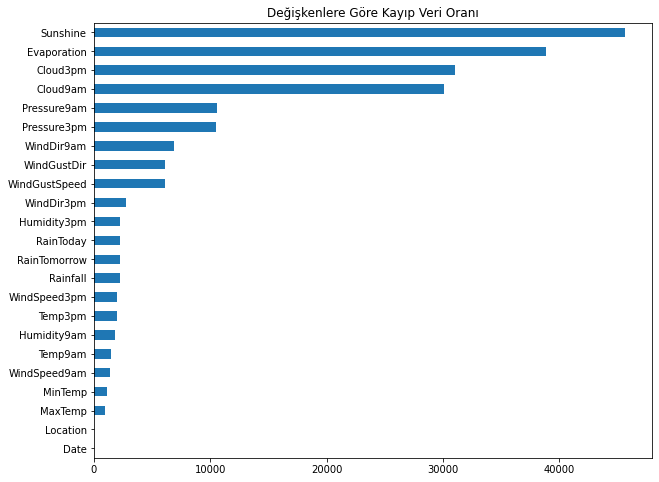

In [31]:
missing_counts = data.isnull().sum().sort_values(ascending=True)
missing_counts.plot.barh(figsize=(10,8), title="Değişkenlere Göre Kayıp Veri Oranı")

In [32]:
data['RainToday'].mode()

0    No
dtype: object

In [33]:
data['RainToday'].value_counts()

No     57576
Yes    16307
Name: RainToday, dtype: int64

In [34]:
data['RainToday'] = data['RainToday'].fillna('No')

In [35]:
data['RainTomorrow'].value_counts()

No     57577
Yes    16307
Name: RainTomorrow, dtype: int64

In [38]:
corr_matrix = data.corr()
corr_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.712368,0.101076,0.468007,0.012001,0.211898,0.157577,0.156315,-0.221007,0.020588,-0.411959,-0.392576,0.109352,0.050004,0.905862,0.683673
MaxTemp,0.712368,1.000000,-0.086991,0.572511,0.445459,0.071186,-0.065030,0.014988,-0.442877,-0.521236,-0.308863,-0.384533,-0.267748,-0.255201,0.866169,0.983932
Rainfall,0.101076,-0.086991,1.000000,-0.041697,-0.215746,0.134901,0.107412,0.063653,0.220614,0.256063,-0.133749,-0.090832,0.192255,0.155446,0.009227,-0.090058
Evaporation,0.468007,0.572511,-0.041697,1.000000,0.307476,0.218679,0.167871,0.104002,-0.460185,-0.338377,-0.270844,-0.277833,-0.135360,-0.119450,0.545178,0.551459
Sunshine,0.012001,0.445459,-0.215746,0.307476,1.000000,-0.059152,-0.050572,0.006324,-0.465811,-0.631798,0.041098,-0.010665,-0.687996,-0.704563,0.228259,0.469612
WindGustSpeed,0.211898,0.071186,0.134901,0.218679,-0.059152,1.000000,0.596458,0.711628,-0.238540,-0.007047,-0.484643,-0.442804,0.063316,0.111213,0.191275,0.034639
WindSpeed9am,0.157577,-0.065030,0.107412,0.167871,-0.050572,0.596458,1.000000,0.524098,-0.258571,0.034621,-0.230297,-0.158726,0.030655,0.083260,0.092322,-0.077964
WindSpeed3pm,0.156315,0.014988,0.063653,0.104002,0.006324,0.711628,0.524098,1.000000,-0.169321,0.013125,-0.318806,-0.271910,0.051159,0.038907,0.143146,-0.009731
Humidity9am,-0.221007,-0.442877,0.220614,-0.460185,-0.465811,-0.238540,-0.258571,-0.169321,1.000000,0.621574,0.181231,0.202883,0.444933,0.319098,-0.440686,-0.433185
Humidity3pm,0.020588,-0.521236,0.256063,-0.338377,-0.631798,-0.007047,0.034621,0.013125,0.621574,1.000000,0.028144,0.098507,0.508282,0.508961,-0.205990,-0.567771


In [39]:
temp = data[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']]
temp.corr()

,MinTemp,MaxTemp,Temp9am,Temp3pm
MinTemp,1.000000,0.712368,0.905862,0.683673
MaxTemp,0.712368,1.000000,0.866169,0.983932
Temp9am,0.905862,0.866169,1.000000,0.839755
Temp3pm,0.683673,0.983932,0.839755,1.000000


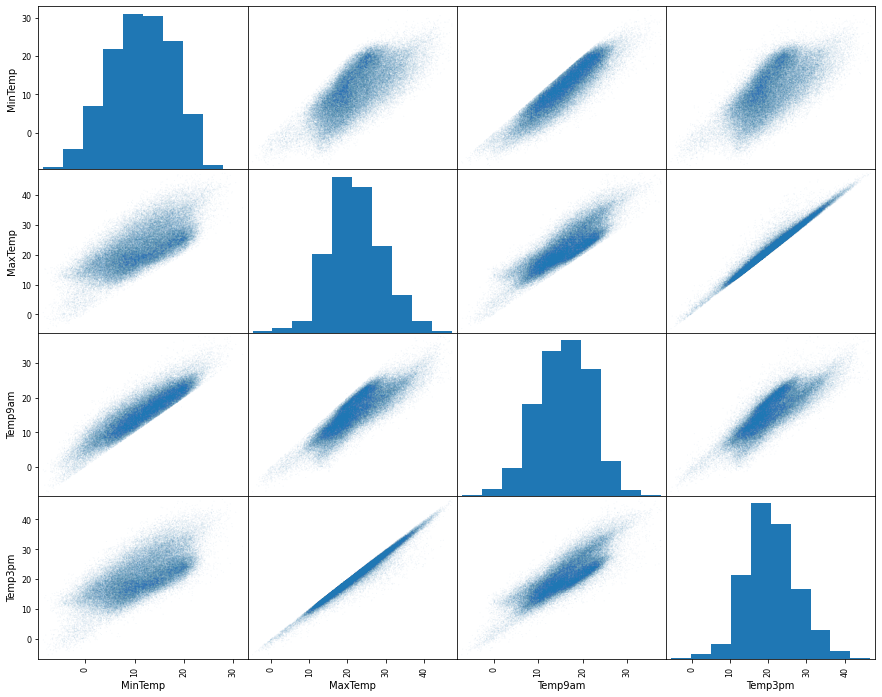

In [41]:
from pandas.plotting import scatter_matrix
scatter_matrix(temp, figsize=(15,12), alpha=0.05, s=5);

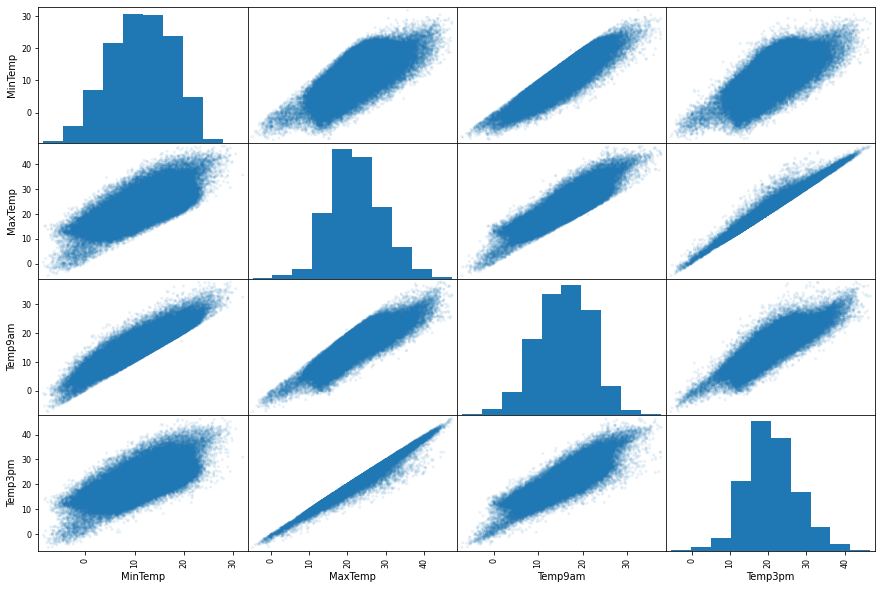

In [42]:
scatter_matrix(temp, figsize=(15,10), alpha=0.1);

In [43]:
windspeed = data[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']]
windspeed.corr()

,WindGustSpeed,WindSpeed9am,WindSpeed3pm
WindGustSpeed,1.000000,0.596458,0.711628
WindSpeed9am,0.596458,1.000000,0.524098
WindSpeed3pm,0.711628,0.524098,1.000000


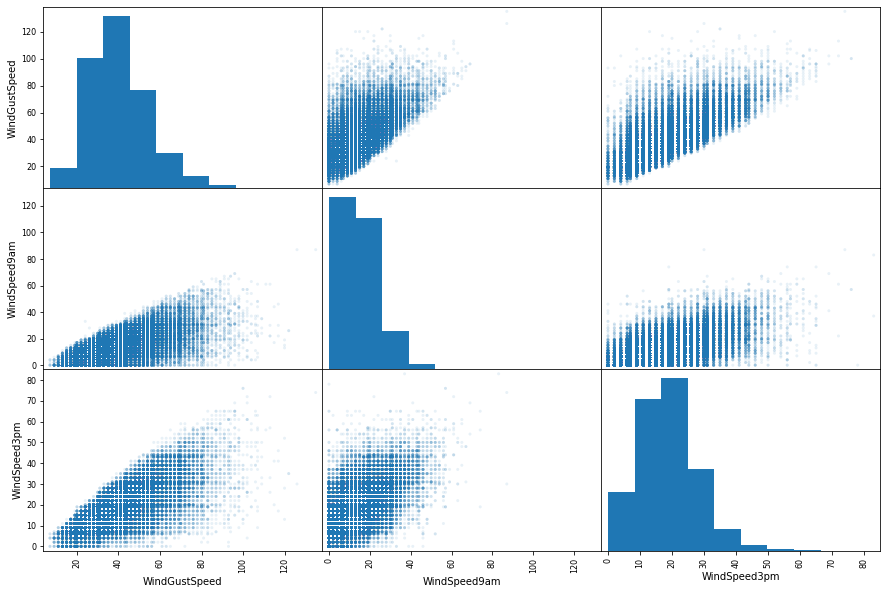

In [44]:
scatter_matrix(windspeed, figsize=(15,10), alpha=0.1);

In [45]:
humid = data[['Humidity9am', 'Humidity3pm']]
humid.corr()

,Humidity9am,Humidity3pm
Humidity9am,1.000000,0.621574
Humidity3pm,0.621574,1.000000


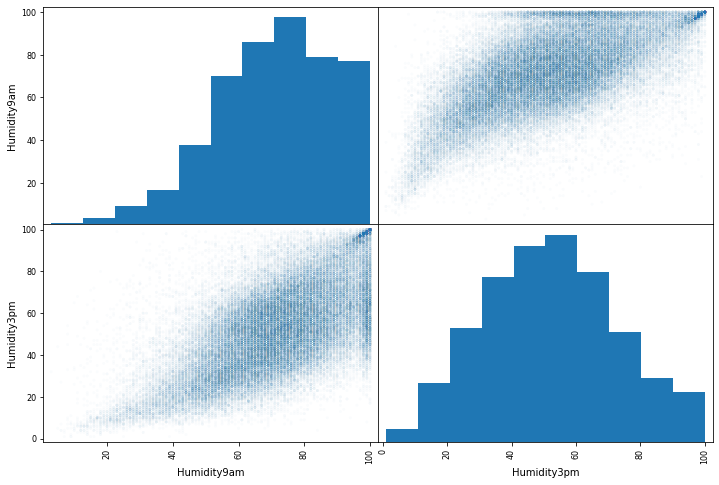

In [46]:
scatter_matrix(humid, figsize=(12,8), alpha=0.02);

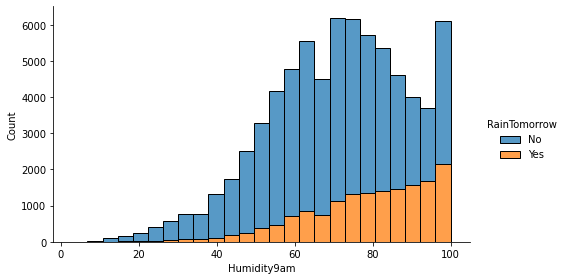

In [47]:
sns.displot(data = data, kind = 'hist', x = 'Humidity9am', hue = 'RainTomorrow', multiple = 'stack',bins=25,height = 4, aspect = 1.7)

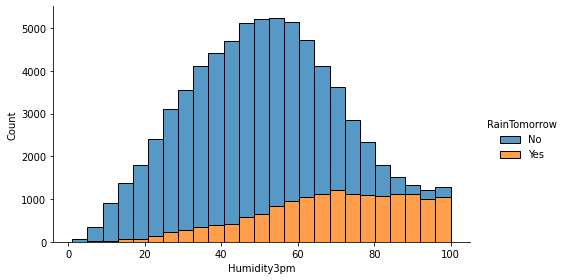

In [48]:
sns.displot(data = data, kind = 'hist', x = 'Humidity3pm', hue = 'RainTomorrow', multiple = 'stack',bins=25,height = 4, aspect = 1.7)

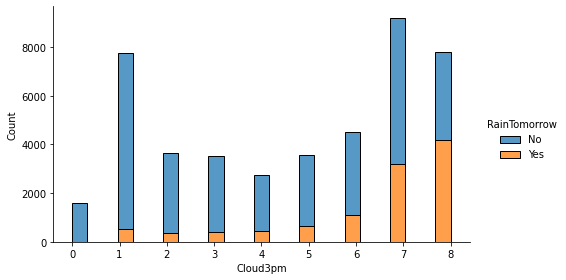

In [49]:
sns.displot(data = data, kind = 'hist', x = 'Cloud3pm', hue = 'RainTomorrow', multiple = 'stack',bins=25,height = 4, aspect = 1.7)

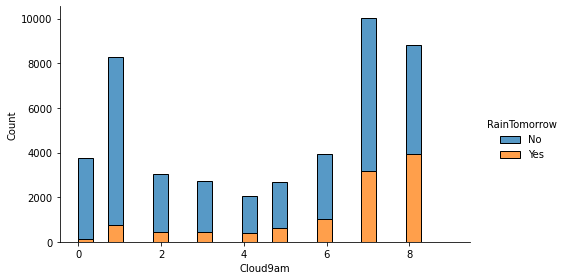

In [50]:
sns.displot(data = data, kind = 'hist', x = 'Cloud9am', hue = 'RainTomorrow', multiple = 'stack',bins=25,height = 4, aspect = 1.7)

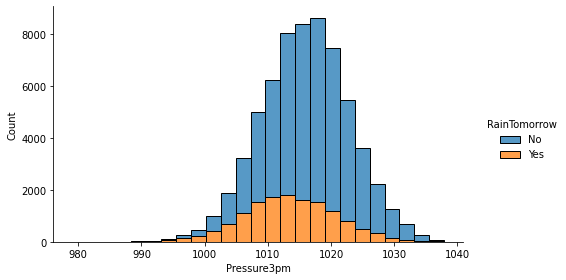

In [51]:
sns.displot(data = data, kind = 'hist', x = 'Pressure3pm', hue = 'RainTomorrow', multiple = 'stack',bins=25,height = 4, aspect = 1.7)

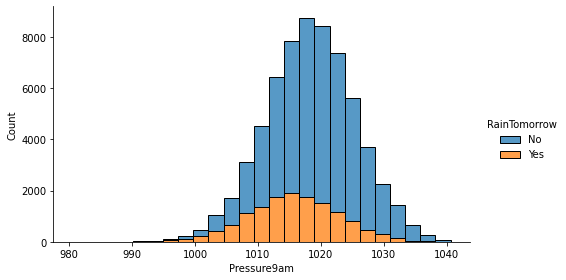

In [52]:
sns.displot(data = data, kind = 'hist', x = 'Pressure9am', hue = 'RainTomorrow', multiple = 'stack',bins=25,height = 4, aspect = 1.7)

In [90]:
data = data.dropna(how='any')
print(data.shape)

(25579, 17)


In [94]:
categoric_c = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
datafinal = pd.get_dummies(data, columns=categoric_c)
print(datafinal.shape)
datafinal.head()

(25579, 62)


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
6049,17.9,35.2,0.0,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,26.6,33.4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6050,18.4,28.9,0.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,20.3,27.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6052,19.4,37.6,0.0,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,28.7,34.9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6053,21.9,38.4,0.0,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,29.1,35.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6054,24.2,41.0,0.0,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,33.6,37.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [105]:
standa = MinMaxScaler()
standa.fit(datafinal)
datafinal = pd.DataFrame(standa.transform(datafinal), index=datafinal.index, columns=datafinal.columns)
datafinal.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
6049,0.661290,0.719907,0.0,0.333333,0.061538,0.243243,0.148936,0.121212,0.432161,0.435678,0.718421,0.700472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6050,0.674731,0.574074,0.0,0.234234,0.261538,0.229730,0.255319,0.070707,0.542714,0.567753,0.552632,0.549528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6052,0.701613,0.775463,0.0,0.315315,0.430769,0.175676,0.382979,0.212121,0.532663,0.518010,0.773684,0.735849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6053,0.768817,0.793981,0.0,0.180180,0.061538,0.054054,0.329787,0.212121,0.539363,0.516295,0.784211,0.752358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6054,0.830645,0.854167,0.0,0.216216,0.230769,0.148649,0.138298,0.141414,0.505863,0.487136,0.902632,0.799528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
corr = datafinal.corr()
corr1 = pd.DataFrame(abs(corr['RainTomorrow']),columns = ['RainTomorrow'])
nonvals = corr1.loc[corr1['RainTomorrow'] < 0.005]
print('Var correlation < 0.5%',nonvals)
nonvals = nonvals.index.values

Var correlation < 0.5%                  RainTomorrow
WindGustDir_NW       0.002200
WindGustDir_SW       0.002868
WindGustDir_WNW      0.003505
WindGustDir_WSW      0.004895
WindDir3pm_ENE       0.004111
WindDir9am_NW        0.000213
WindDir9am_SSW       0.002292
WindDir9am_W         0.001185


In [102]:
datafinal1 = datafinal.drop(columns=nonvals,axis=1)
print('Data Final',datafinal1.shape)

Data Final (25579, 54)


In [108]:
from sklearn.model_selection import train_test_split
Y = datafinal1['RainTomorrow']
X = datafinal1.drop(columns=['RainTomorrow'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [109]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (20463, 53)
Y train shape:  (20463,)
X test shape:  (5116, 53)
Y test shape:  (5116,)


LGBM CLASSIFICATION

In [112]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
model = lgb.LGBMClassifier()
model.fit(X_train, Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [114]:
predict_train = model.predict(X_train)
print("Target on train data",predict_train)

Target on train data [0. 0. 0. ... 1. 0. 0.]


In [118]:
accuracy_train = accuracy_score(Y_train,predict_train)
print('\n Accuracy_score on train dataset : ', accuracy_train)
predict_test = model.predict(X_test)
print('\n Target on test data',predict_test)


 Accuracy_score on train dataset :  0.8866246395934125

 Target on test data [1. 0. 0. ... 0. 1. 0.]


In [119]:
accuracy_test = accuracy_score(Y_test,predict_test)
print('\n Accuracy_score on test dataset : ', accuracy_test)


 Accuracy_score on test dataset :  0.8430414386239249
